In [3]:
# importing packs
import numpy as np
import pandas as pd
import glob 
import matplotlib.pyplot as plt

# reading data and creating dataframe

DATA_PATH = 'data/PhysicalFlows_12.1.G/*.csv'

files = glob.glob(DATA_PATH)
df_flow_all = pd.concat([pd.read_csv(file, sep = '\t') for file in files], ignore_index = True )



ValueError: No objects to concatenate

In [ ]:
# making sure the date and times are in order



df_flow_all['DateTime'] = pd.to_datetime(df_flow_all['DateTime'])

df_flow_all = df_flow_all.set_index('DateTime')

df_flow_all = df_flow_all.sort_index()



df_flow_all

,InMapCode,OutMapCode,FlowValue
DateTime,,,
2019-01-01 00:00:00,AL,GR,173.00
2019-01-01 00:00:00,SE,DE_TenneT_GER,1.60
2019-01-01 00:00:00,DE,PL,0.00
2019-01-01 00:00:00,SE,DE,1.60
2019-01-01 00:00:00,DE,SE,0.00
...,...,...,...
2023-12-31 23:00:00,GB,NIE,121.70
2023-12-31 23:00:00,GB,IE_SEM,121.70
2023-12-31 23:00:00,SI,HU,250.29


In [ ]:
#reseting index for later use

df_flow_all = df_flow_all.reset_index()

# filtering norway to germany 
exports = df_flow_all[(df_flow_all['InMapCode'] == 'NO2') & (df_flow_all['OutMapCode'] == 'DE_LU')]



# filtering germany to norway

imports = df_flow_all[(df_flow_all['InMapCode'] == 'DE_LU') & (df_flow_all['OutMapCode'] == 'NO2')]

df_flow_all


,DateTime,InMapCode,OutMapCode,FlowValue
0,2019-01-01 00:00:00,AL,GR,173.00
1,2019-01-01 00:00:00,SE,DE_TenneT_GER,1.60
2,2019-01-01 00:00:00,DE,PL,0.00
3,2019-01-01 00:00:00,SE,DE,1.60
4,2019-01-01 00:00:00,DE,SE,0.00
...,...,...,...,...
14402341,2023-12-31 23:00:00,GB,NIE,121.70
14402342,2023-12-31 23:00:00,GB,IE_SEM,121.70
14402343,2023-12-31 23:00:00,SI,HU,250.29
14402344,2023-12-31 23:00:00,GE,AM,0.00


In [ ]:
# converting norway to germany dataframe to weekly

exports['DateTime'] = pd.to_datetime(exports['DateTime'])

exports_W = exports.pivot_table(index=[pd.Grouper(key = 'DateTime', freq = 'W'), 'InMapCode', 'OutMapCode'], values = 'FlowValue', aggfunc='sum').reset_index()
exports_W

NameError: name 'pd' is not defined

In [ ]:
#converting germany to norway dataframe to weekly

imports_W = imports.pivot_table(index=[pd.Grouper(key = 'DateTime', freq = 'W'), 'InMapCode', 'OutMapCode'], values = 'FlowValue', aggfunc='sum').reset_index()
imports_W

,DateTime,InMapCode,OutMapCode,FlowValue
0,2020-09-06,DE_LU,NO2,416.5650
1,2020-09-13,DE_LU,NO2,49.3525
2,2020-09-20,DE_LU,NO2,251.7025
3,2020-09-27,DE_LU,NO2,493.4625
4,2020-10-04,DE_LU,NO2,1611.9525
...,...,...,...,...
169,2023-12-03,DE_LU,NO2,37466.2400
170,2023-12-10,DE_LU,NO2,46808.3600
171,2023-12-17,DE_LU,NO2,85028.6400
172,2023-12-24,DE_LU,NO2,41917.1025


In [ ]:
# merging the two dataframes


merged_df = pd.merge(exports_W, imports_W, on = ['DateTime'], suffixes = ('_export', '_import'))



merged_df.fillna(0, inplace= True) # removing NaNs

print(merged_df.head())

# creating netflow column
merged_df['NetFlow'] = merged_df['FlowValue_export'] - merged_df['FlowValue_import']

print(merged_df.head())



    DateTime InMapCode_export OutMapCode_export  FlowValue_export  \
0 2020-09-06              NO2             DE_LU          301.5225   
1 2020-09-13              NO2             DE_LU         1210.3850   
2 2020-09-20              NO2             DE_LU           76.7000   
3 2020-09-27              NO2             DE_LU          121.0250   
4 2020-10-04              NO2             DE_LU         1524.2600   

  InMapCode_import OutMapCode_import  FlowValue_import  
0            DE_LU               NO2          416.5650  
1            DE_LU               NO2           49.3525  
2            DE_LU               NO2          251.7025  
3            DE_LU               NO2          493.4625  
4            DE_LU               NO2         1611.9525  
    DateTime InMapCode_export OutMapCode_export  FlowValue_export  \
0 2020-09-06              NO2             DE_LU          301.5225   
1 2020-09-13              NO2             DE_LU         1210.3850   
2 2020-09-20              NO2       

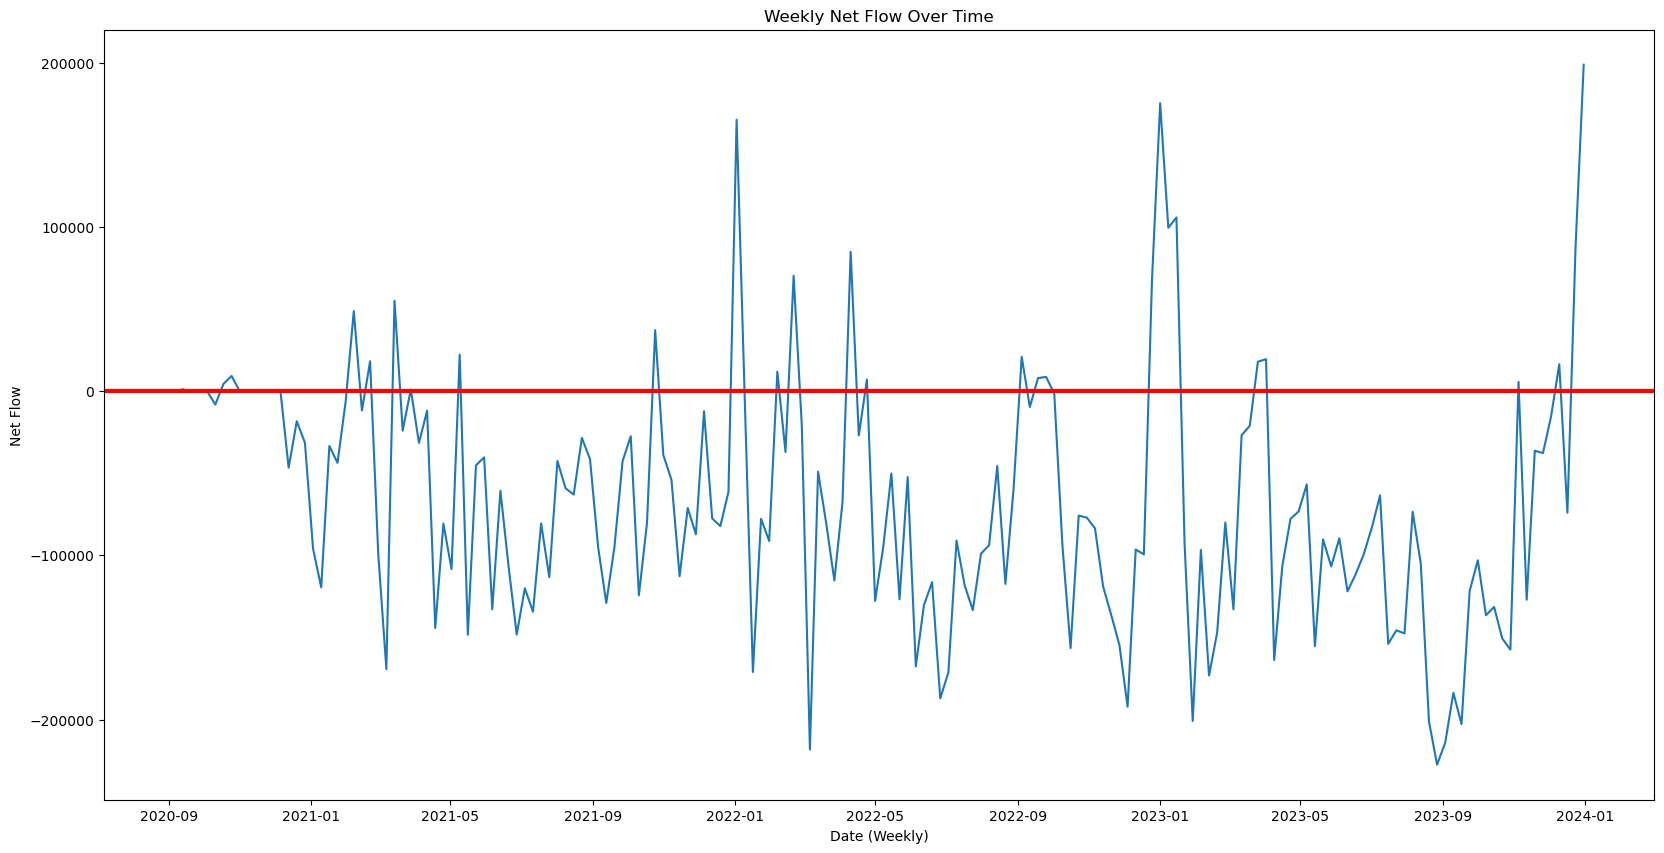

In [ ]:
# ensuring merged dataframe is in datetime format
merged_df['DateTime'] = pd.to_datetime(merged_df['DateTime'])

# plotting the graph and adding labels

plt.figure(figsize = (20,10))

plt.plot(merged_df['DateTime'], merged_df['NetFlow'], linestyle = '-')

plt.title('Weekly Net Flow Over Time')
plt.xlabel('Date (Weekly)')
plt.ylabel('Net Flow')
plt.axhline(color = 'red', linewidth = 3)
plt.show()
